# H07 - Rats tumor data

_Adapted from Josep Fortiana (2023-05-15) by Jordi Abante (2024-05-06)_

Taken from 

- Gelman et al. (2013), Bayesian Data Analysis, 3ed, 5.1, pag. 102
- Alicia Carriquiri, ENAR 2006 Course on Bayesian methods for data analysis
- Aki Vehtari, Markus Paasiniemi, [Bayesian Data Analysis demo 5.1](http://avehtari.github.io/BDA_R_demos/demos_ch5/demo5_1.html)

# 1. Problem setting and empirical Bayes solution

A toxicity experiment performed on rats.

$\theta$ is the probability that a rat receiving no treatment develops a tumor.

## Data

A number $y=4$ rats out of a group of $n=14$ rats develop a tumor.

In [1]:
n<-14
y<-4
tumor.rate<-y/n
round(tumor.rate,3)

[1] 0.286

## Simple Bayesian analysis

We set a prior pdf on $\theta$. For instance a pdf in the conjugate family.

$$
    \begin{array}{ll}
        &y\,|\,\theta       &\sim\operatorname{Binom}(n,\theta)\\
    &\theta\,|(\alpha,\beta)&\sim\operatorname{Beta}(\alpha,\beta)
    \end{array}
$$

## Posterior pdf for $\theta$

Now we know that the posterior pdf is:

$$
    \theta\,|(y,\alpha,\beta)\sim\operatorname{Beta}(\alpha+y,\beta+n-y)=\operatorname{Beta}(\alpha+4,\beta+10).
$$

From which we can obtain everything we need, such as a 95% credible interval for $\theta$, or its posterior mean, or a posterior predictive pmf for a new $\widetilde{y}$ in a further experiment with a new set of $\widetilde{n}$ rats.

## Historical data

Which $(\alpha,\beta)$ values will we take?   

In the absence of previous information we could use a Non-Informative Prior such as the uniform or the Jeffreys prior.

Assume that historical data are available, from  a collection of $n=70$ previous experiments on similar groups of rats. 

In the $j$-th historical experiment, let the number of rats with tumors be $y_{j}$ and the total number of rats be $n_{j}$. 

We model the $y_{j}$’s as independent binomial data, given sample sizes $n_{j}$ and study-specific means $\theta_{j}$.

<figure>
<Center><img src="Img/Fig.5.1.Rats.tumor.data.Hierarchical.model.jpg" style= "width:12cm;height:8cm"/>
<figcaption>
Figure 5.1. Structure of the hierarchical model for the rat tumor example.
</figcaption></Center>
</figure>

Assuming that a common $\operatorname{Beta}$ prior distribution with parameters $(\alpha,\beta)$ is a good description of the population distribution of the $\theta_{j}$’s in the historical experiments, we can display the hierarchical model schematically as in Figure 5.1, with $\theta_{71}$ and $y_{71}$ corresponding to the current experiment (we rename our previous $y$ and $n$ to $n_{71}$ and $n_{71}$)

In [2]:
y.71<-y
n.71<-n
f.71<-y.71/n.71
#
Rats.tumor.data<-read.table("Data/Rats.tumor.data.txt",header=TRUE)
str(Rats.tumor.data)
#
y<-Rats.tumor.data$y
N<-Rats.tumor.data$N
n<-length(y)
#
y.tot<-sum(y)
n.tot<-sum(N)
#
head(Rats.tumor.data) # See full data in Table 5.1 BDA3, pag. 102.
y.tot
n.tot

'data.frame':	70 obs. of  2 variables:
 $ y: int  0 0 0 0 0 0 0 0 0 0 ...
 $ N: int  20 20 20 20 20 20 20 19 19 19 ...


,y,N
,<int>,<int>
1,0,20
2,0,20
3,0,20
4,0,20
5,0,20
6,0,20


[1] 263

[1] 1725

## Empirical Bayes estimate using the historical data

In each $j$-th group, the relative frequency $f_{j}=y_{j}/n_{j}$ is the ML estimator of $\theta_{j}$ and, considering the set of $70$ values $\widehat{\theta}_{j}=f_{j}$ as a sample of $\operatorname{Beta}(\alpha,\beta)$, from which we can _estimate_ $\alpha$ and $\beta$.

In [3]:
f<-y/N
mu<-mean(f)
sigma<-sd(f)
round(mu,3)
round(sigma,3)

[1] 0.136

[1] 0.103

If we set the mean and standard deviation of the population distribution to these values, we can solve for $\alpha$ and $\beta$. We saw these formulas in the Binomial data session.
    
$$
   \begin{array}{lcl}
       \dfrac{\alpha}{\alpha+\beta}&=&\mu,\\
       \dfrac{\alpha\cdot\beta}{(\alpha+\beta)^2\cdot(\alpha+\beta+1)}&=&\sigma^{2}.
   \end{array}
$$

We isolate $\alpha$ and $\beta$ in terms of $\mu$ and $\sigma^{2}$:

$$
    \begin{array}{lcl}
       G     &=&\dfrac{\mu\cdot(1-\mu)}{\sigma^{2}}-1,\\
       \alpha&=&\mu\cdot G,\\
       \beta &=&(1-\mu)\cdot G.
   \end{array}
$$

In [4]:
G<-mu*(1-mu)/sigma^2-1
alpha<-mu*G
beta<-(1-mu)*G
round(alpha,3)
round(beta,3)

[1] 1.356

[1] 8.615

## Posterior pdf of $\theta$

With these $\alpha$ and $\beta$, after the $71$-th experiment, the posterior pdf of $\theta$ is a:

$$
    \textrm{Beta}(\alpha_{\text{post}},\;\beta_{\text{post}})=\textrm{Beta}(\alpha+y_{71},\;\beta+n_{71}-y_{71})=\textrm{Beta}(1.356+4,\;8.615+14-4)
$$

In [5]:
alpha.post<-alpha+y.71
beta.post<-beta+n.71-y.71
round(alpha.post,3)
round(beta.post,3)

[1] 5.356

[1] 18.615

whose posterior mean, variance and standard deviation are:

In [6]:
mu.post<-alpha.post/(alpha.post+beta.post)
sigma2.post<-alpha.post*beta.post/((alpha.post+beta.post)^2*(alpha.post+beta.post-1))
sigma.post<-sqrt(sigma2.post)
round(mu.post,3)
round(sigma2.post,3)
round(sigma.post,3)

[1] 0.223

[1] 0.008

[1] 0.087

The posterior mean of $\theta$ can be compared to the much larger sample ML estimate, the relative frequency, which does not take into account any historical information:

In [7]:
round(f.71,3)

[1] 0.286

# 2. Full Bayesian solution

Approach: place a hyperprior on the parameters $(\alpha,\beta)$.

Can still use all the data to estimate the hyperparameters.

Idea: Bayesian analysis on the joint distribution of all parameters $\theta=(\theta_{1},\dots,\theta_{71})$ and $(\alpha,\beta)$, in order to obtain the joint posterior pdf $h(\theta,\alpha,\beta\,|\,y)$ of  $(\theta,\alpha,\beta)$
conditional on the vector of all observations $y=(y_{1},\dots,y_{71})$.

In [8]:
# Restore the full sample joining the 70 previous observations and the last one
y<-c(y,y.71)
N<-c(N,n.71)
J<-length(y)
J

[1] 71

## Model

Sampling distribution for data from experiments $j=1,\dots,71$:

$$
    y_{j}\sim\operatorname{Binom}(n_{j},\theta _{j})
$$

Tumor rates $\theta _{j}$ assumed to be independent draws from Beta:

$$
    \theta _{j}\sim\operatorname{Beta}(\alpha,\beta).
$$

We will choose a non-informative prior $p(\alpha,\beta)$ for $(\alpha,\beta)$ to indicate prior ignorance.

**Notation warning:** following BDA3 notation, from now on we use the same notation $p(\;\cdot\;)$ to designate any pdf, prior, posterior, likelihood or whatever. In this way everything runs smoother. Also the total number of observations (71) will be denoted by $J$.

For the moment we do not write $p(\alpha,\beta)$ explicitly. However, some limitations must be kept in mind: Since this hyperprior will be non-informative, and perhaps improper, we must check integrability of posterior, that is, that this posterior is a proper _probability_ density function.

## Different posterior distributions

### 1. Joint posterior pdf of all parameters, given $y$

$$
    \begin{array}{lcl}
        p(\theta,\alpha,\beta\,|\,y)
        &\propto &\Big[\;\text{Joint prior of}\mskip8mu (\theta,\,\alpha,\,\beta)\;\Big]
        \times\Big[\;\text{Likelihood of}\mskip8mu y\mskip8mu\text{given}\mskip8mu (\theta,\alpha,\beta)\;\Big]\\[0.3cm]
        &\propto &p(\theta,\,\alpha,\,\beta)\cdot p(y\,|\,\theta,\alpha,\beta)\\[0.3cm]
        &\propto &p(\alpha,\beta)\cdot p(\theta\,|\,\alpha,\beta)\cdot p(y\,|\,\theta,\alpha,\beta)\\[0.3cm]
        &\propto &p(\alpha,\beta)\cdot\displaystyle\prod_{j=1}^{J}\dfrac{\Gamma(\alpha+\beta)}
        {\Gamma(\alpha)\cdot\Gamma(\beta)}\cdot\theta_{j}^{\alpha-1}\cdot(1-\theta_{j})^{\beta-1}
        \times\,\displaystyle\prod_{j=1}^{J}\theta_{j}^{y_{j}}\cdot(1-\theta_{j})^{n_{j}-y_{j}}.
    \end{array}
$$

### 2. Conditional posterior pdf of $\theta$, given $(\alpha,\beta)$ and $y$

Given $(\alpha,\beta)$, the components of $\theta$ have independent posterior densities, each $j$-th of which is a 
$\operatorname{Beta}(\alpha+y_{j},\beta+n_{j}-y_{j})$ pdf.

$$
    \begin{array}{lcl}
        p(\theta\,|\,\alpha,\beta,y)
        &=&\displaystyle\prod_{j=1}^{J}\dfrac{\Gamma(\alpha+\beta+n_{j})}
        {\Gamma(\alpha+y_{j})\cdot\Gamma(\beta+n_{j}-y_{j})}\cdot
        \theta_{j}^{\alpha+y_{j}-1}\cdot(1-\theta_{j})^{\beta+n_{j}-y_{j}-1}
    \end{array}
$$

### 3. Marginal posterior pdf of $(\alpha,\beta)$, given $y$

Now we want the marginal posterior pdf $p(\alpha,\beta\,|\,y)$, where $\theta$ has been integrated out. 

We see this pdf is obtained from the two pdf's above:

$$
    \tag{$\star$}
    p(\alpha,\beta\,|\,y)=\dfrac{p(\theta,\alpha,\beta\,|\,y)}{p(\theta\,|\,\alpha,\beta,y)}.
$$

<b>Indeed:</b> Expanding numerator and denominator according to their definitions:

$$
    p(\theta,\alpha,\beta\,|\,y)=\dfrac{p(\theta,\alpha,\beta,y)}{p(y)},
    \mskip70mu
    p(\theta\,|\,\alpha,\beta,y)=\dfrac{p(\theta,\alpha,\beta,y)}{p(\alpha,\beta,y)}.
$$

Then the quotient in $(\star)$ is $p(\alpha,\beta,y)/p(y)$

This marginal posterior will be expressed, of course, in terms of the so far unknown prior pdf $p(\alpha,\beta)$.

<b>Finally:</b> From **1** and **2** above, substituting in $(\star)$


$$
    p(\alpha,\beta\,|\,y)\propto
    p(\alpha,\beta)\cdot\displaystyle\prod_{j=1}^{J}\left(\dfrac{\Gamma(\alpha+\beta)}
        {\Gamma(\alpha)\cdot\Gamma(\beta)}\cdot
        \dfrac{\Gamma(\alpha+y_{j})\cdot\Gamma(\beta+n_{j}-y_{j})}{\Gamma(\alpha+\beta+n_{j})}\right).
$$

This expression is quite involved, but easy to evaluate numerically for any values of $(\alpha,\beta)$, as it is done below.

## Choice of a noninformative (hyper)prior $p(\alpha,\beta)$

### 1. Parametrization

As a motivation, remember, from the chapter on binomial data, that when:

$$
    \begin{array}{lcl}
        &y\,|\,\theta       &\sim&\operatorname{Binom}(n,\theta)\\[0.3cm]
    &\theta\,|(\alpha,\beta)&\sim&\operatorname{Beta}(\alpha,\beta)
    \end{array}
$$

then the posterior pdf is:

$$
    \theta\,|(y,\alpha,\beta)\sim\operatorname{Beta}(\alpha+y,\beta+n-y).
$$

and the posterior expectation is:

$$
    \operatorname{E}(\theta\,|\,y)=\dfrac{\alpha+y}{\alpha+\beta+n}
    =\lambda\cdot\dfrac{y}{n}+(1-\lambda)\cdot\dfrac{\alpha}{\alpha+\beta}
$$

a convex combination of the ML estimate $\;\dfrac{y}{n}\;$ from the observed data and the prior expectation $\;\dfrac{\alpha}{\alpha+\beta}$, where the coefficient is: $\;\lambda=\dfrac{n}{\alpha+\beta+n}$.

### 2. A first attempt

In both expressions, prior parameters $\alpha$ and $\beta$ can be meaningfully organized as:

$$
    \pi=\dfrac{\alpha}{\alpha+\beta}=\text{"prior probability"},\mskip30mu
    \zeta=\alpha+\beta=\text{"prior sample size."}
$$

Hence it would seem that a reasonable noninformative prior could be an (improper) uniform pdf on the natural parameters, that is, the usual transforms of $(\pi,\zeta)$ to the $(-\infty,\infty)$ domain:

$$
    u=\operatorname{logit}(\pi)=\log\left(\dfrac{\pi}{1-\pi}\right)=\log\big(\dfrac{\alpha}{\beta}\big),
    \mskip8mu\text{and}\mskip8mu v=\log(\zeta)=\log(\alpha+\beta).
$$

As it happens, the posterior pdf for this prior is improper, so it cannot be used.

### 3. A second-best candidate

In BDA3, the alternative uniform on:

$$
     \pi=\dfrac{\alpha}{\alpha+\beta},\mskip8mu\text{and}\mskip8mu
     w=(\alpha+\beta)^{-1/2}.
$$

The Jacobian for this transformation is:

$$
    J=\dfrac{\partial(\pi,w)}{\partial(\alpha,\beta)}=
    \left(\begin{array}{cc}
    \dfrac{\beta}{(\alpha+\beta)^2} &-\dfrac{\alpha}{(\alpha+\beta)^2}\\[0.2cm]
    -\dfrac{1}{2}\,(\alpha+\beta)^{-3/2}&-\dfrac{1}{2}\,(\alpha+\beta)^{-3/2}
    \end{array}\right),
$$

which gives $|J|=\dfrac{1}{2}\,(\alpha+\beta)^{-5/2}$ and, from the uniform pdf on $(\pi,w)$, the transformed pdf
in terms of $(\alpha,\beta)$ is:

$$
    p(\alpha,\beta)\propto (\alpha+\beta)^{-5/2}.
$$

In BDA3 they obtain this hyperprior in terms of the natural parameters:

$$
    u=\log\big(\dfrac{\alpha}{\beta}\big),\mskip8mu\text{and}\mskip8mu v=\log(\alpha+\beta).
$$

Now, the Jacobian of the transformation:

$$
    \dfrac{\partial(u,v)}{\partial(\alpha,\beta)}=\dfrac{1}{\alpha\,\beta},
    \mskip8mu\text{hence}\mskip8mu 
    \dfrac{\partial(\alpha,\beta)}{\partial(u,v)}=\alpha\,\beta,
$$

and the transformed density is:

$$
    p(u,v)\propto \alpha\,\beta\,(\alpha+\beta)^{-5/2}.
$$

## Code by Aki Vehtari

Taken from the referenced above tutorial. 

In [9]:
#install.packages("ggplot2", repos= "https://cloud.r-project.org")
#install.packages("gridExtra", repos= "https://cloud.r-project.org")
#install.packages("tidyr", repos= "https://cloud.r-project.org")
require(ggplot2,quietly=TRUE)
require(gridExtra,quietly=TRUE)
require(tidyr,quietly=TRUE)

Data

In [10]:
y <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,
        2,1,5,2,5,3,2,7,7,3,3,2,9,10,4,4,4,4,4,4,4,10,4,4,4,5,11,12,
        5,5,6,5,6,6,6,6,16,15,15,9,4)
n <- c(20,20,20,20,20,20,20,19,19,19,19,18,18,17,20,20,20,20,19,19,18,18,25,24,
       23,20,20,20,20,20,20,10,49,19,46,27,17,49,47,20,20,13,48,50,20,20,20,20,
       20,20,20,48,19,19,19,22,46,49,20,20,23,19,22,20,20,20,52,46,47,24,14)

Evaluate densities in grid

In [11]:
x <- seq(0.0001, 0.9999, length.out = 1000)

Helper function to evaluate density over observations

In [12]:
bdens <- function(n, y, x)
    dbeta(x, y+1, n-y+1)

Separate model

In [13]:
df_sep <- mapply(bdens, n, y, MoreArgs = list(x = x)) %>%
  as.data.frame() %>% cbind(x) %>% gather(ind, p, -x)

Plot the separate model

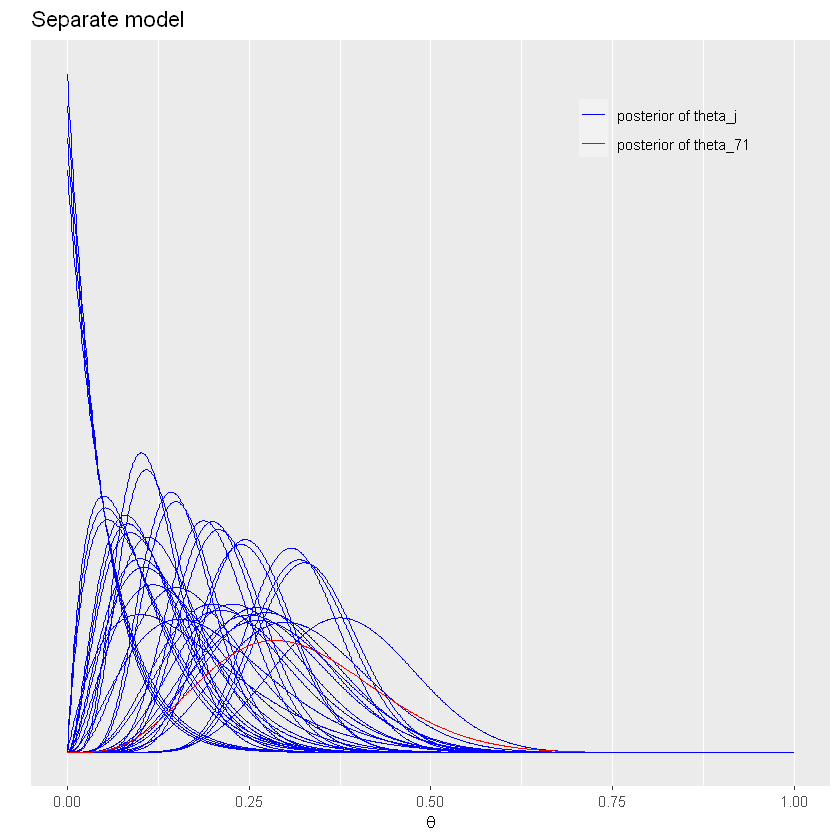

In [14]:
labs1 <- paste('posterior of', c('theta_j', 'theta_71'))
plot_sep <- ggplot(data = df_sep) +
  geom_line(aes(x = x, y = p, color = (ind=='V71'), group = ind)) +
  labs(x = expression(theta), y = '', title = 'Separate model', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = c('blue','red'), labels = labs1) +
  theme(legend.background = element_blank(), legend.position = c(0.8,0.9))
# The last one is for emphasize colored red
options(repr.plot.width=7,repr.plot.height=7)
plot_sep

Pooled model

In [15]:
df_pool <- data.frame(x = x, p = dbeta(x, sum(y)+1, sum(n)-sum(y)+1))

Create a plot for the pooled model

In [16]:
plot_pool <- ggplot(data = df_pool) +
  geom_line(aes(x = x, y = p, color = '1')) +
  labs(x = expression(theta), y = '', title = 'Pooled model', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = 'red', labels = 'Posterior of common theta') +
  theme(legend.background = element_blank(), legend.position = c(0.7,0.9))

Plot both separate and pooled model

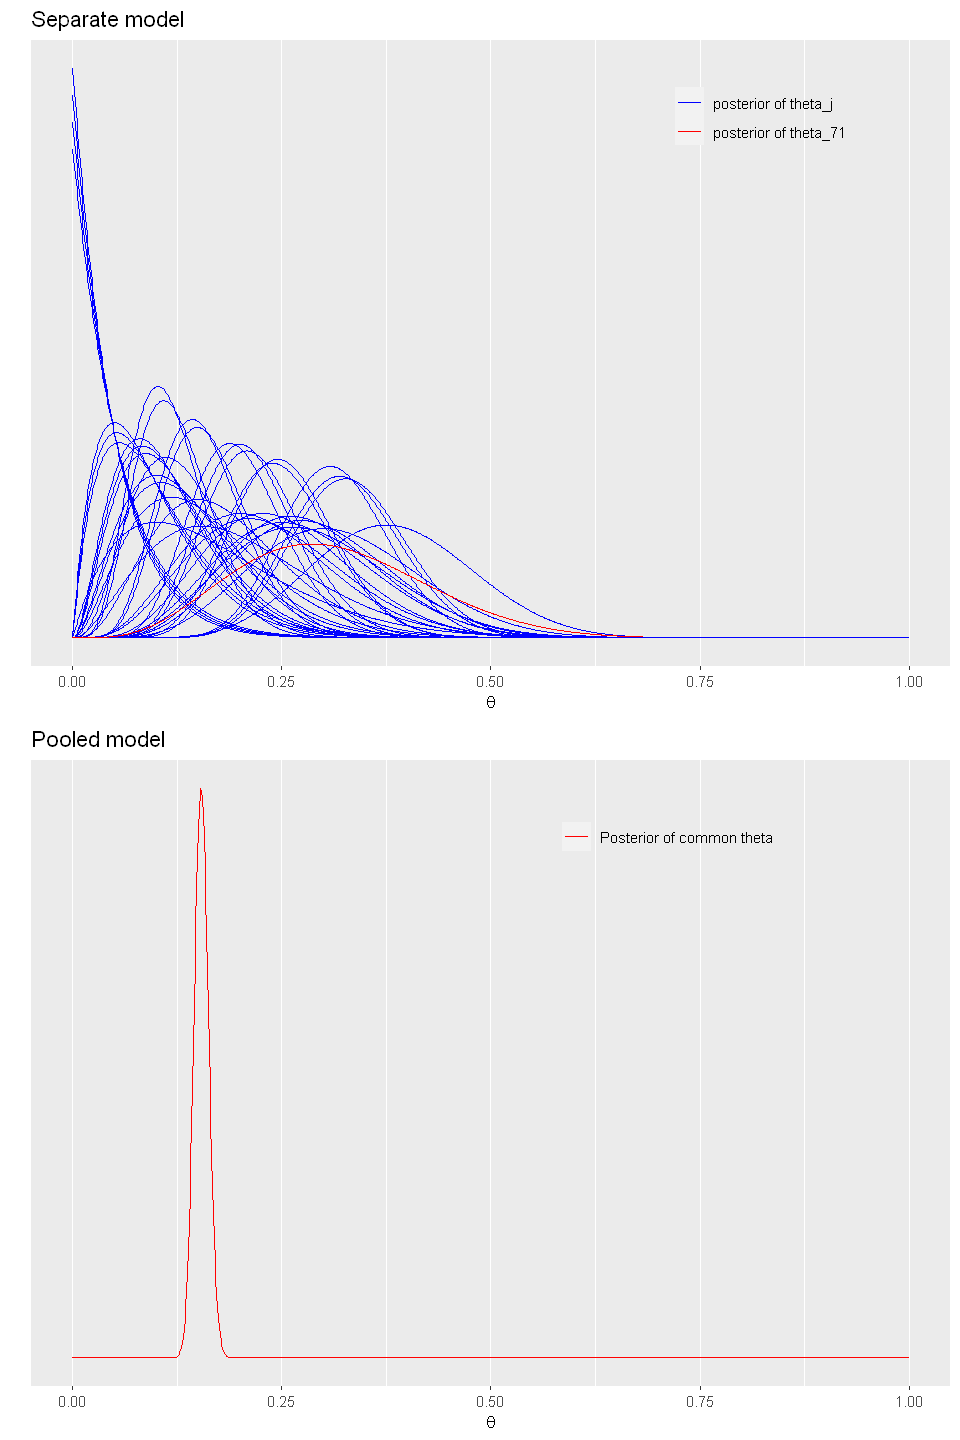

In [17]:
options(repr.plot.width=8,repr.plot.height=12)
grid.arrange(plot_sep, plot_pool)

Compute the marginal posterior of alpha and beta in hierarchical model. Use grid

In [18]:
A <- seq(0.5, 6, length.out = 100)
B <- seq(3, 33, length.out = 100)

Make vectors that contain all pairwise combinations of A and B

In [19]:
cA <- rep(A, each = length(B))
cB <- rep(B, length(A))

Recall the marginal posterior distribution is given by:

\begin{equation}
p(\alpha, \beta \mid y) \propto p(\alpha, \beta) \prod_{j=1}^J \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \frac{\Gamma\left(\alpha+y_j\right) \Gamma\left(\beta+n_j-y_j\right)}{\Gamma\left(\alpha+\beta+n_j\right)}
\end{equation}

and we are assuming that 

\begin{equation}
p(u, v) \propto \alpha \beta(\alpha+\beta)^{-5 / 2}
\end{equation}

Use logarithms for numerical accuracy!

In [20]:
lpfun <- function(a, b, y, n){log(a+b)*(-5/2) +
  sum(lgamma(a+b)-lgamma(a)-lgamma(b)+lgamma(a+y)+lgamma(b+n-y)-lgamma(a+b+n))}
lp <- mapply(lpfun, cA, cB, MoreArgs = list(y, n))

Subtract maximum value to avoid over/underflow in exponentation

In [21]:
df_marg <- data.frame(x = cA, y = cB, p = exp(lp - max(lp)))

Create a plot of the marginal posterior density

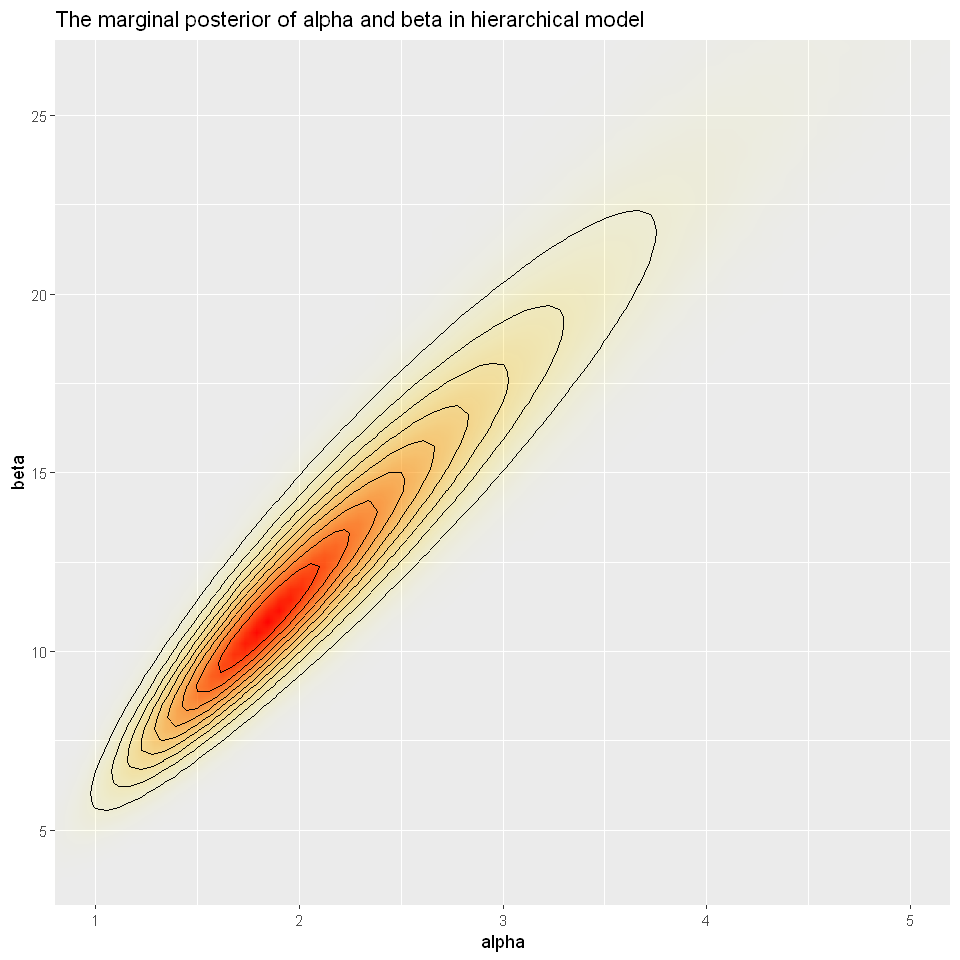

In [22]:
options(repr.plot.width=8,repr.plot.height=8)
title1 <- 'The marginal posterior of alpha and beta in hierarchical model'
ggplot(data = df_marg, aes(x = x, y = y)) +
  geom_raster(aes(fill = p, alpha = p), interpolate = T) +
  geom_contour(aes(z = p), colour = 'black', linewidth = 0.2) +
  coord_cartesian(xlim = c(1,5), ylim = c(4, 26)) +
  labs(x = 'alpha', y = 'beta', title = title1) +
  scale_fill_gradient(low = 'yellow', high = 'red', guide = "none") +
  scale_alpha(range = c(0, 1), guide = "none")

Sample from the grid (with replacement)

In [23]:
nsamp <- 100
samp_indices <- sample(length(df_marg$p), size = nsamp,
                       replace = TRUE, prob = df_marg$p/sum(df_marg$p))
samp_A <- cA[samp_indices[1:nsamp]]
samp_B <- cB[samp_indices[1:nsamp]]
df_psamp <- mapply(function(a, b, x) dbeta(x, a, b),
                  samp_A, samp_B, MoreArgs = list(x = x)) %>%
  as.data.frame() %>% cbind(x) %>% gather(ind, p, -x)

Create plot for samples from the distribution of distributions
$\textrm{Beta}(\alpha,\beta)$, that is, plot $\textrm{Beta}(\alpha,\beta)$ using posterior
samples of $\alpha$ and $\beta$.

In [24]:
# helper function to convert ind to numeric for subsetting
indtonum <- function(x) strtoi(substring(x,2))
title2 <- 'Posterior samples from the distribution of distributions Beta(a,b)'
plot_psamp <- ggplot(data = subset(df_psamp, indtonum(ind) <= 20)) +
  geom_line(aes(x = x, y = p, group = ind)) +
  labs(x = expression(theta), y = '', title = title2) +
  scale_y_continuous(breaks = NULL)

The average of above distributions, is the predictive distribution for a new $\theta$, and also the prior distribution for $\theta_{j}$.

In [25]:
df_psampmean <- spread(df_psamp, ind, p) %>% subset(select = -x) %>%
    rowMeans() %>% data.frame(x = x, p = .)

Create plot for samples from the predictive distribution for new $\theta$

In [26]:
title3 <- 
plot_psampmean <- ggplot(data = df_psampmean) +
  geom_line(aes(x = x, y = p)) +
  labs(x = expression(theta), y = '', title = expression(paste('Predictive distribution for a new ',theta,' and prior for ',theta[j]))) +
  scale_y_continuous(breaks = NULL)

Combine the plots

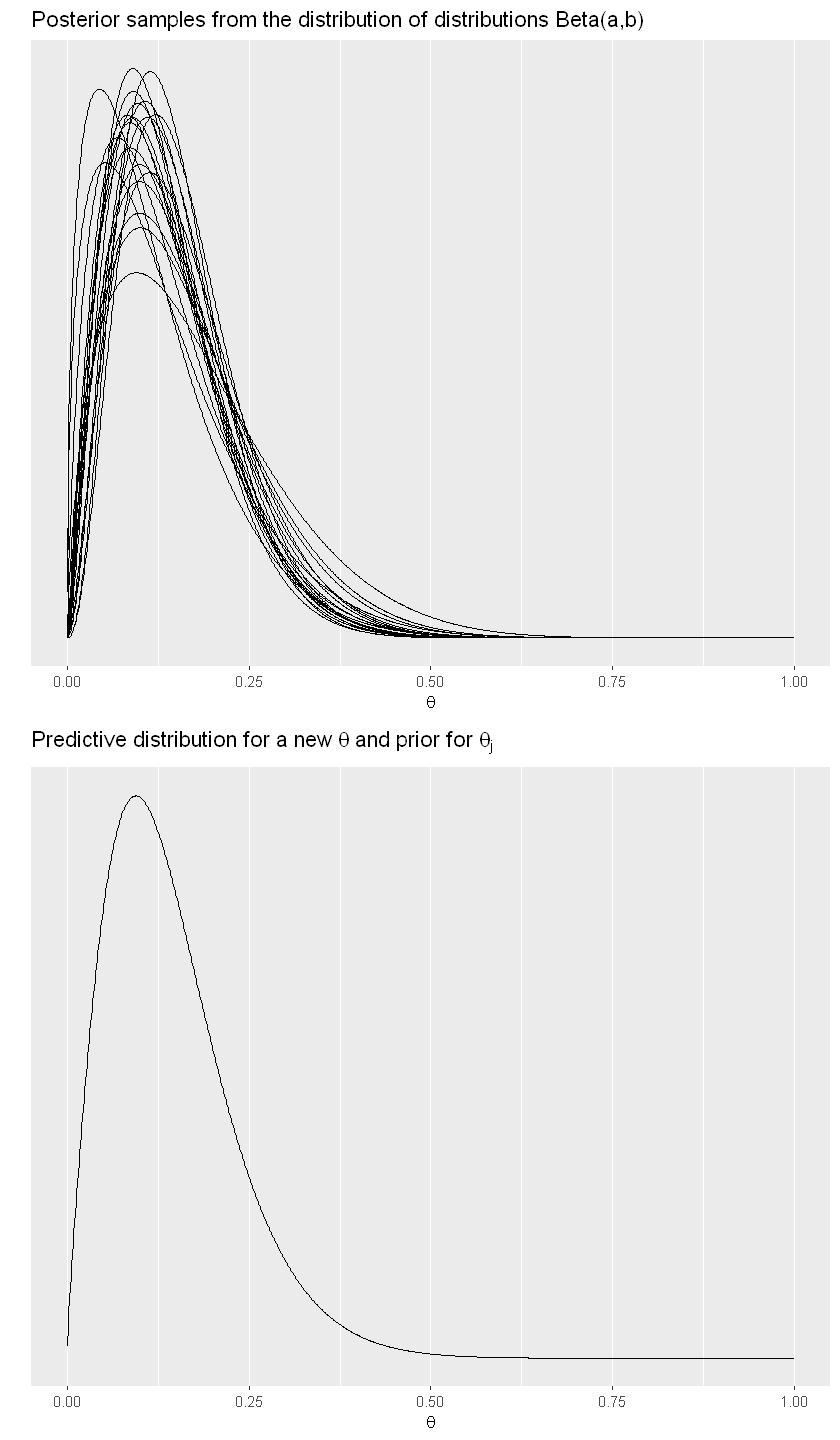

In [27]:
options(repr.plot.width=7,repr.plot.height=12)
grid.arrange(plot_psamp, plot_psampmean)

And finally compare the separate model and hierarchical model
(using every seventh sample for clarity)

Create plot for the separate model

In [28]:
plot_sep7 <- ggplot(data = subset(df_sep, indtonum(ind)%%7==0)) +
  geom_line(aes(x = x, y = p, color = (ind=='V49'), group = ind)) +
  labs(x = expression(theta), y = '', title = 'Separate model', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = c('blue', 'red'), guide = "none") +
  theme(legend.background = element_blank(), legend.position = c(0.8,0.9))

Note that these marginal posteriors for theta_j are more narrow than in the separate model case, due to the borrowed information from the other $\theta_j$'s. Average density over samples (of a and b) for each (n,y)-pair at each point $x$

In [29]:
bdens2 <- function(n, y, a, b, x)
  rowMeans(mapply(dbeta, a + y, n - y + b, MoreArgs = list(x = x)))
df_hier <- mapply(bdens2, n, y, MoreArgs = list(samp_A, samp_B, x)) %>%
  as.data.frame() %>% cbind(x) %>% gather(ind, p, -x)

Create plot for the hierarchical model

In [30]:
plot_hier7 <- ggplot(data = subset(df_hier, indtonum(ind)%%7==0)) +
  geom_line(aes(x = x, y = p, color = (ind=='V49'), group = ind)) +
  labs(x = expression(theta), y = '', title = 'Hierarchical model', color = '') +
  scale_color_manual(values = c('blue', 'red'), guide = "none") +
  scale_y_continuous(breaks = NULL) +
  theme(legend.background = element_blank(), legend.position = c(0.8,0.9))

Combine the plots

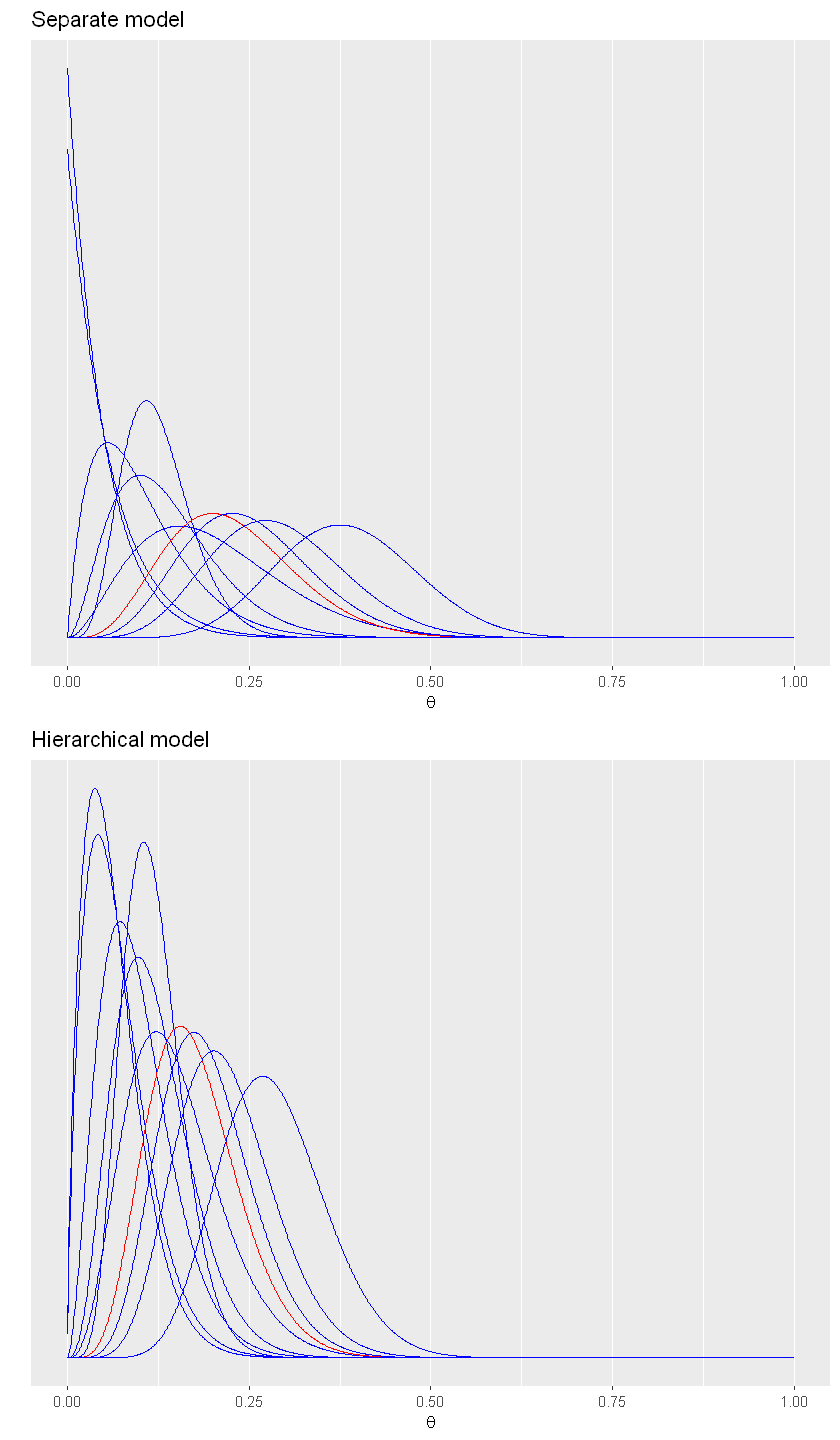

In [31]:
options(repr.plot.width=7,repr.plot.height=12)
grid.arrange(plot_sep7, plot_hier7)